0.007088162989275217


/var/folders/hr/lpbm_3jn03g8ytn87t3vnc680000gn/T/ipykernel_55920/340479667.py:24: RuntimeWarning: invalid value encountered in divide
  sigma_afs = afstandc/afstandc*0.5


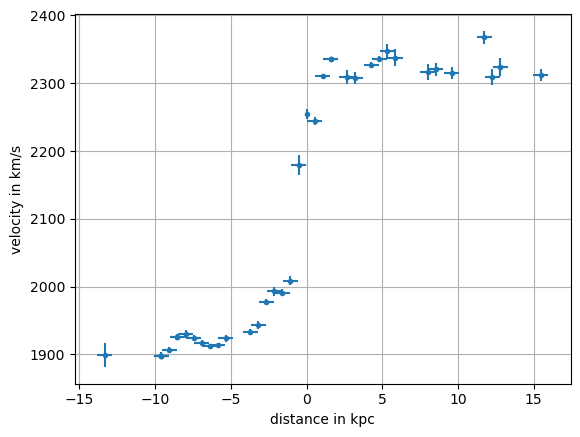

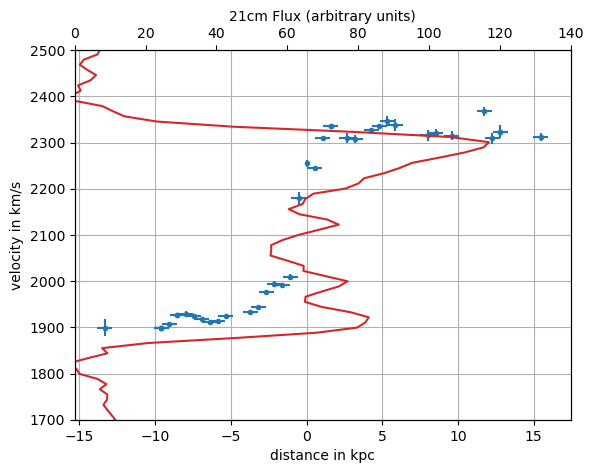

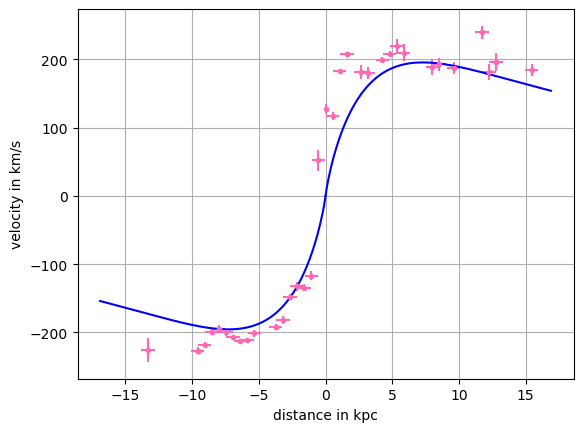

In [7]:
#!/usr/bin/env python3 # -*- coding: utf-8 -*-

"""
Rotation Curve of a Galaxy
"""

import numpy as np
import matplotlib.pyplot as plt
import scipy.special
from astropy.io import fits
from scipy.optimize import curve_fit

plt.close('all')

#Global constants
lmbd_em =  6564.61 # H-alpha wavelenght in AA
pixel_scale = 0.189 # arcsec per pixel
c = 3.0 * 10 ** 5 #speed of light [km/s]


#Load wavelength measurements 
data = np.genfromtxt('/Users/samakshkaushik/Desktop/Projects/Dark-matter-in-spiral-galaxy/NGC5676/filename.csv', skip_header=1, delimiter=',')
afstandc = np.array(data[:,3])
sigma_afs = afstandc/afstandc*0.5
lambdac = np.array(data[:,0])
sigma_lamb = np.array(data[:,2]) 

#Loading 21 cm line data
data_21 = np.loadtxt('/Users/samakshkaushik/Desktop/Projects/Dark-matter-in-spiral-galaxy/NGC5676/21cm/21cm.data')
velocity_21 = data_21[:,0]
flux_21 = data_21[:,2]

#beregner hastighed
z = lambdac/lmbd_em-1
zmean = np.mean(z)
print(zmean)
#zmean = 0.007299
vel = z*c
sigma_vel = sigma_lamb/lambdac*c 

#First plot: velocity as a function of distance
plt.figure()
plt.grid()
plt.errorbar(afstandc,vel,xerr=sigma_afs,yerr=sigma_vel,fmt='.')
plt.ylabel('velocity in km/s')
plt.xlabel('distance in kpc')
plt.show()

#Second plot: rotation curve together with 21 cm data
fig, ax1 = plt.subplots()
plt.grid()
ax1.set_xlabel('distance in kpc')
ax1.set_ylabel('velocity in km/s')
ax1.errorbar(afstandc,vel,yerr=sigma_vel,xerr=sigma_afs,fmt='.')
ax1.set_ylim(2100-400, 2100+400)

ax2 = ax1.twiny()
ax2.set_xlabel('21cm Flux (arbitrary units)')
ax2.set_ylabel('velocity in km/s')
ax2.plot(flux_21,velocity_21,color='tab:red')
ax2.set_xlim(0, 140)
plt.show()

#Overplot theoretical model for exponential disk

def CircularSpeedExponentialDisk(y):
    vcsq = 4*np.pi*G*sigma0*Rd*y**2*\
    (scipy.special.i0(y)*scipy.special.k0(y)-\
     scipy.special.i1(y)*scipy.special.k1(y))
    return vcsq

#Ref: 
# S4G. M* = 10^10.96
# Scale length: https://iopscience.iop.org/article/10.1088/0004-637X/696/1/411 
# HI mass: https://arxiv.org/pdf/astro-ph/0609660.pdf
M_stellar = 10 ** 10.96 #[M_sun]
M_gas = 10**9.94 
M_baryon = M_stellar + M_gas
M_sun = 1.989*10**30 #Mass of sun in [kg]
Rd = 3.39*3.086*10**19 # disk scale length
c = 3.0 * 10 ** 5 #speed of light [km/s]
G = 6.674 * 10**(-11) #NW gravitaional constant in SI units

sigma0 = M_baryon * M_sun/ (2*np.pi*Rd**2)
x = np.arange(0.001,17,0.1)
y = x*3.086*10**19/(2*Rd)
vcsq = CircularSpeedExponentialDisk(y)
vc = np.sqrt(vcsq)/1000 #km/s
vc_r = vc*np.sin(62./360*2*np.pi) # correct for inclination

z = lambdac/lmbd_em-1
zmean = np.mean(z)
vel = (z-zmean)/(1+zmean)*c
sigma_vel = sigma_lamb/lambdac*c

plt.figure()
plt.grid()
plt.errorbar(afstandc,vel,yerr=sigma_vel,xerr=sigma_afs,fmt='.',color='hotpink')
plt.ylabel('velocity in km/s')
plt.xlabel('distance in kpc')
plt.plot(x,vc_r,color='blue')
plt.plot(-x,-vc_r,color='blue')


plt.show()



